In [1]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sta
import math
import random
import statsmodels.stats.weightstats as sw
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

# 177面

## 读取数据

In [3]:
data1 = pd.read_excel(r"C:\Users\柠檬\Desktop\实验6\第9章 相关与回归.xlsx",sheet_name=0)
columns = data1.columns
columns = list(columns[:3])
columns.append('x·y')
columns.append('y²')
columns.append('x²')
data1.columns = columns
data1

,月份,电视广告费用,月销售收入,x·y,y²,x²
0,1,35,650,22750,422500,1225
1,2,30,591,17730,349281,900
2,3,28,570,15960,324900,784
3,4,18,540,9720,291600,324
4,5,21,570,11970,324900,441
5,6,24,564,13536,318096,576
6,7,17,520,8840,270400,289
7,8,21,565,11865,319225,441
8,9,32,595,19040,354025,1024
9,10,30,610,18300,372100,900


## 计算相关系数

In [4]:
n = data1.shape[0] - 1
xy = n * data1.iloc[12,3] - data1.iloc[12,1] * data1.iloc[12,2]
x = np.sqrt(n * data1.iloc[12,5] - data1.iloc[12,1] ** 2)
y = np.sqrt(n * data1.iloc[12,4] - data1.iloc[12,2] ** 2)
r = xy / (x * y)
print("相关系数：%f"%(r))

相关系数：0.907408


## 绘制散点图

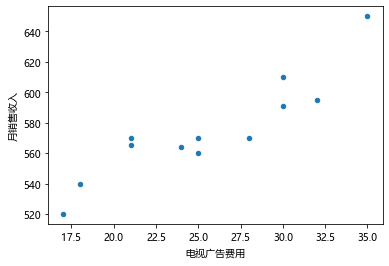

In [5]:
data1[:-1].plot(kind='scatter',x='电视广告费用',y='月销售收入')
plt.show()

# 185面

## 建立线性回归模型

In [6]:
model = LinearRegression()
x = np.array(data1.iloc[:-1,1])
t = x.reshape(x.shape[0],1)
y = data1.iloc[:-1,2]
n = len(y)
model.fit(t,data1.iloc[:-1,2])
r2 = model.score(t,y)
y_ = model.predict(t)
Se = np.sqrt(sum([(y[_] - y_[_]) ** 2 for _ in range(n)]) / (n-1-1))
AdjustedR2 = 1 - (1-r2)*(n-1)/(n-1-1)
df = pd.DataFrame(index=['Multiple R','R Square','Adjusted R Square',
                         '标准误差','观测值'],data={'回归统计':[r,r2,AdjustedR2,Se,n]})
df

,回归统计
Multiple R,0.907408
R Square,0.823390
Adjusted R Square,0.805729
标准误差,14.723699
观测值,12.000000


## 方差分析

In [7]:
dfa = 1
dfb = n - 2
ssa = sum([(y_[_] - y.mean()) ** 2 for _ in range(n)])
ssb = sum([(y[_] - y_[_]) ** 2 for _ in range(n)])
msa = ssa / dfa
msb = ssb / dfb
f = msa / msb
ppf = sta.f.ppf(0.95,dfa,dfb)#f临界值
p = 1 - sta.f.cdf(f,dfa,dfb)#p值
series = pd.Series(data='回归分析，残差，总计'.split('，'),name='项目')
df = pd.DataFrame(index=series, data={ 'df':[1,10,11],'SS':[ssa,ssb,ssa+ssb], 'MS':[msa,msb,np.nan],'F':[f,np.nan,np.nan], 'F检验':[p,np.nan,np.nan]})
df

,df,SS,MS,F,F检验
项目,,,,,
回归分析,1,10107.043447,10107.043447,46.62193,0.000046
残差,10,2167.873219,216.787322,NaN,NaN
总计,11,12274.916667,NaN,NaN,NaN


## 回归系数的显著性检验

In [8]:
x2 = sm.add_constant(t)
est = sm.OLS(y,x2)
est2 = est.fit()
coef = est2.params
std_err = est2.bse
t = est2.tvalues
p = est2.pvalues
ud = est2.conf_int()
df = pd.DataFrame(index = ['Intercept','X Variable 1'],data={'coef':[coef[0],coef[1]],'标准误差':[std_err[0],std_err[1]],'t值':[t[0],t[1]],'p值':[p[0],p[1]],'下限 95%':[ud[0][0],ud[0][1]],'上限 95%':[ud[1][0],ud[1][1]]})
df

,coef,标准误差,t值,p值,下限 95%,上限 95%
Intercept,438.581197,20.486045,21.408779,1.102082e-09,392.935445,484.226948
X Variable 1,5.366097,0.785893,6.828025,4.580176e-05,3.615018,7.117175


# Maospalace.EXCEL

In [9]:
data2 = pd.read_excel(r"C:\Users\柠檬\Desktop\实验6\Maospalace.xlsx")
data2 = data2.drop(['Unnamed: 4','Unnamed: 5'],axis=1)
data2

,Bowl Price,Bowls,Soda,Beer
0,9.3,391,313,90
1,9.1,418,326,100
2,8.5,459,358,115
3,9.5,424,331,81
4,8.7,447,380,89
...,...,...,...,...
181,8.5,447,380,103
182,9.4,404,327,81
183,9.9,408,310,61
184,8.0,457,356,82


In [10]:
x = np.array(data2.iloc[:,0])
x = x.reshape(x.shape[0],1)
x2 = sm.add_constant(x)

## 每碗牛肉面的价格与卖出的牛肉面的碗数一元线性分析

In [11]:
y = data2.iloc[:,1]
model = sm.OLS(y,x2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Bowls   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     189.0
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           4.75e-30
Time:                        18:07:24   Log-Likelihood:                -794.42
No. Observations:                 186   AIC:                             1593.
Df Residuals:                     184   BIC:                             1599.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        695.8741     19.491     35.703      0.0

R²=0.507，说明回归方程的拟合程度拟合程度较好

## 每碗牛肉面的价格与卖出的苏打水的瓶数的一元线性分析

In [12]:
y = data2.iloc[:,2]
model = sm.OLS(y,x2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Soda   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     93.74
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           3.54e-18
Time:                        18:07:24   Log-Likelihood:                -824.55
No. Observations:                 186   AIC:                             1653.
Df Residuals:                     184   BIC:                             1660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        562.3356     22.918     24.537      0.0

R²=0.338，说明回归方程的拟合程度拟合程度一般

## 每碗牛肉面的价格与卖出的啤酒的瓶数的一元线性分析

In [13]:
y = data2.iloc[:,3]
model = sm.OLS(y,x2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Beer   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     7.170
Date:                Wed, 30 Jun 2021   Prob (F-statistic):            0.00808
Time:                        18:07:24   Log-Likelihood:                -756.55
No. Observations:                 186   AIC:                             1517.
Df Residuals:                     184   BIC:                             1524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        127.4591     15.901      8.016      0.0

R²=0.038,说明每碗牛肉面的价格与卖出的啤酒的瓶数没有明显线性关系